In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import cmocean 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
%pylab inline



Populating the interactive namespace from numpy and matplotlib


## load data to xarray, slice in time, and then convert to pandas dataframe

In [2]:

glid_path = '/home/z3526974/Work/data/Glider_data/IMOS_ANFOG_BCEOPSTUV_20170911T071056Z_SL287_FV01_timeseries_END-20171002T010328Z.nc'  

ds = xr.open_dataset(glid_path)

ts = ds.sel(TIME=slice('2017-09-16', '2017-09-23'))

# Get onshore and offshore segments
g1 = ds.sel(TIME=slice('2017-09-16T00:00:00', '2017-09-16T13:00:00'))
g2 = ds.sel(TIME=slice('2017-09-16T13:00:00', '2017-09-17T20:00:00'))
g3 = ds.sel(TIME=slice('2017-09-17T20:00:00', '2017-09-18T09:00:00'))
g4 = ds.sel(TIME=slice('2017-09-18T09:00:00', '2017-09-19T01:00:00'))
g5 = ds.sel(TIME=slice('2017-09-19T01:00:00', '2017-09-20T05:00:00'))
g6 = ds.sel(TIME=slice('2017-09-20T05:00:00', '2017-09-21T18:00:00'))
g7 = ds.sel(TIME=slice('2017-09-21T18:00:00', '2017-09-24T00:00:00'))

df = xr.Dataset.to_dataframe(ts)
df.index

DatetimeIndex(['2017-09-16 00:00:01.059107072',
               '2017-09-16 00:00:03.052377344',
               '2017-09-16 00:00:05.077582592',
               '2017-09-16 00:00:07.067111168',
               '2017-09-16 00:00:09.050634752',
               '2017-09-16 00:00:11.063478528',
               '2017-09-16 00:00:13.104032768',
               '2017-09-16 00:00:15.128020992',
               '2017-09-16 00:00:17.132445696',
               '2017-09-16 00:00:19.159280384',
               ...
               '2017-09-23 23:59:41.706848256',
               '2017-09-23 23:59:43.712440064',
               '2017-09-23 23:59:45.703698432',
               '2017-09-23 23:59:47.708465408',
               '2017-09-23 23:59:49.718603264',
               '2017-09-23 23:59:51.737059584',
               '2017-09-23 23:59:53.743988992',
               '2017-09-23 23:59:55.778809856',
               '2017-09-23 23:59:57.796018688',
               '2017-09-23 23:59:59.814344192'],
              dtype=

## Plot map of track

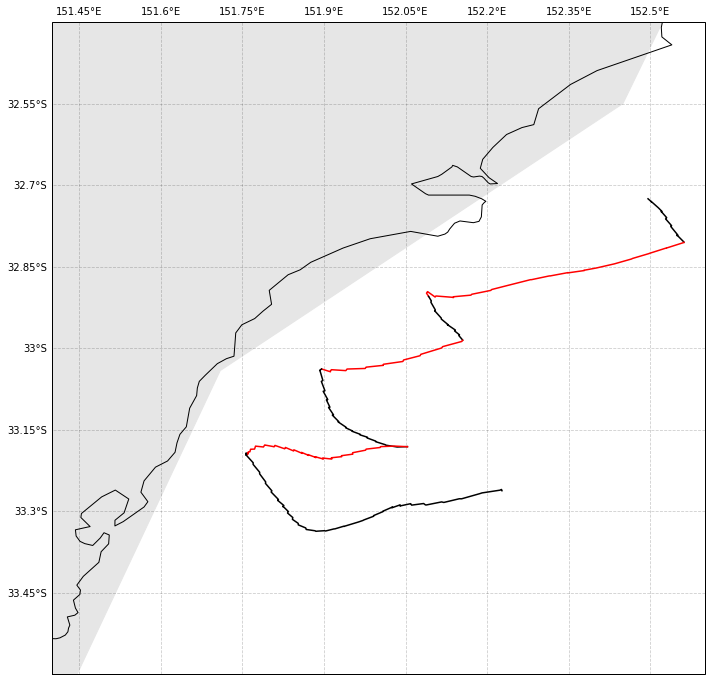

In [3]:
plt.figure(figsize=(12, 12))
ax1 = plt.axes(projection=ccrs.PlateCarree())
plt.plot(g1.LONGITUDE,g1.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g2.LONGITUDE,g2.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g3.LONGITUDE,g3.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g4.LONGITUDE,g4.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g5.LONGITUDE,g5.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g6.LONGITUDE,g6.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g7.LONGITUDE,g7.LATITUDE,transform=ccrs.PlateCarree(),color='black')
ax1.coastlines(resolution='10m')
ax1.set_extent([151.4, 152.6, -33.6, -32.4])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_bottom = False
ax1.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
ax1.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
ax1.add_feature(cfeature.BORDERS, zorder=10)

## Plot section

/home/z3526974/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


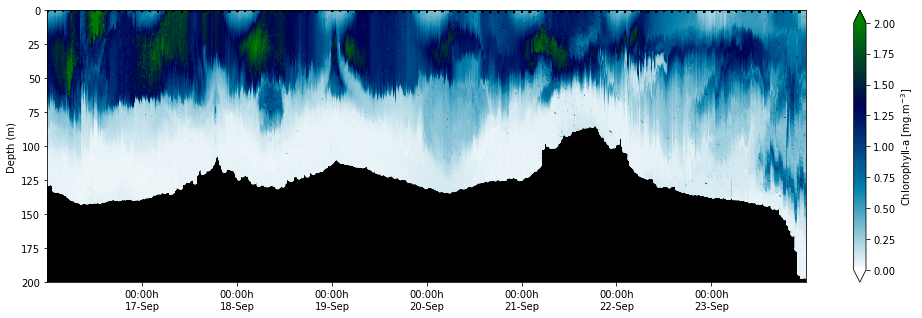

In [4]:
cmap ='ocean_r'

fig, ax = plt.subplots(figsize=(17, 5))
kw = dict(s=15, c=df['CPHL'], marker='o', edgecolor='none',cmap=cmap,vmin=0,vmax=2)
cs = ax.scatter(df.index, df['DEPTH'], **kw)

#plt.plot(g1.TIME,175,color='red')

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)
#pyplot.axhline(y=100, xmin=0,xmax='2017-09-16T13:00:00',color='red')
               
cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel(r'Chlorophyll-a [mg.m$^{-3}$]')
ax.set_ylabel('Depth (m)');
ax.set_facecolor('black')
ax.set_ylim([200,0])

savefig('SL287_glider_chla_section.png', dpi=300,bbox_inches='tight')

## plot timeseries of 3-day composite maps of oceancolour

In [5]:
chla = xr.open_dataset('/home/z3526974/Work/data/dipole_work/Ocean_colour/IMOS_aggregation_20190527T040102Z.nc',decode_times=False)

### make 3-day composites for plotting

In [6]:
chla.time.shape

(13,)

In [7]:
c1 = chla.chl_oc3[3:5,:,:]
c2 = chla.chl_oc3[6:8,:,:]
c3 = chla.chl_oc3[9:11,:,:]
c1

<xarray.DataArray 'chl_oc3' (time: 2, latitude: 801, longitude: 601)>
[962802 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 -30.0 -30.01 -30.02 ... -37.98 -37.99 -38.0
  * time       (time) float64 7.952e+04 7.952e+04
  * longitude  (longitude) float64 149.0 149.0 149.0 149.0 ... 155.0 155.0 155.0
Attributes:
    flag_applied:  HISATZEN LAND CLDICE NAVFAIL
    long_name:     Chlorophyll Concentration, OC3 Algorithm
    units:         mg/m^3

### Plot

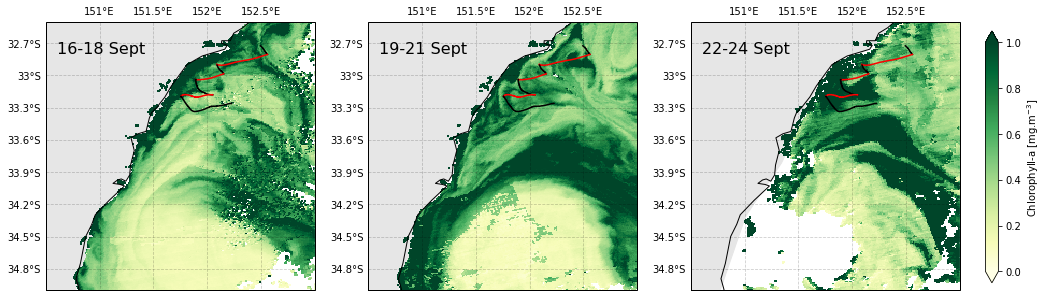

In [15]:
fig = plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1,3,1, projection=ccrs.PlateCarree())
plt.pcolormesh(chla.longitude, chla.latitude, c1.mean(dim='time'), cmap='YlGn', vmin=0, vmax=1,
             transform=ccrs.PlateCarree())

ax1.coastlines(resolution='50m')
ax1.set_extent([150.5, 153, -35, -32.5])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xlocator = mticker.FixedLocator([150.5,151,151.5,152,152.5,153])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_bottom = False
ax1.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
ax1.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
ax1.add_feature(cfeature.BORDERS, zorder=10)
plt.plot(g1.LONGITUDE,g1.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g2.LONGITUDE,g2.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g3.LONGITUDE,g3.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g4.LONGITUDE,g4.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g5.LONGITUDE,g5.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g6.LONGITUDE,g6.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g7.LONGITUDE,g7.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.text(150.6,-32.8,'16-18 Sept',fontsize=16)

ax1 = plt.subplot(1,3,2, projection=ccrs.PlateCarree())
plt.pcolormesh(chla.longitude, chla.latitude, c2.mean(dim='time'), cmap='YlGn', vmin=0, vmax=1,
             transform=ccrs.PlateCarree())

ax1.coastlines(resolution='50m')
ax1.set_extent([150.5, 153, -35, -32.5])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xlocator = mticker.FixedLocator([150.5,151,151.5,152,152.5,153])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_bottom = False
ax1.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
ax1.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
ax1.add_feature(cfeature.BORDERS, zorder=10)
plt.plot(g1.LONGITUDE,g1.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g2.LONGITUDE,g2.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g3.LONGITUDE,g3.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g4.LONGITUDE,g4.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g5.LONGITUDE,g5.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g6.LONGITUDE,g6.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g7.LONGITUDE,g7.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.text(150.6,-32.8,'19-21 Sept',fontsize=16)

ax1 = plt.subplot(1,3,3, projection=ccrs.PlateCarree())
cs = plt.pcolormesh(chla.longitude, chla.latitude, c3.mean(dim='time'), cmap='YlGn', vmin=0, vmax=1,
             transform=ccrs.PlateCarree())

ax1.coastlines(resolution='50m')
ax1.set_extent([150.5, 153, -35, -32.5])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xlocator = mticker.FixedLocator([150.5,151,151.5,152,152.5,153])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_bottom = False
ax1.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
ax1.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
ax1.add_feature(cfeature.BORDERS, zorder=10)
plt.plot(g1.LONGITUDE,g1.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g2.LONGITUDE,g2.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g3.LONGITUDE,g3.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g4.LONGITUDE,g4.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g5.LONGITUDE,g5.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.plot(g6.LONGITUDE,g6.LATITUDE,transform=ccrs.PlateCarree(),color='red')
plt.plot(g7.LONGITUDE,g7.LATITUDE,transform=ccrs.PlateCarree(),color='black')
plt.text(150.6,-32.8,'22-24 Sept',fontsize=16)
fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(cs, cax=cbar_ax, extend='both')
cbar_ax.set_ylabel(r'Chlorophyll-a [mg.m$^{-3}$]')
savefig('chla_spatial_tseries.png', dpi=300,bbox_inches='tight')